![RAPTOR Overview](../RAPTOR.png)

## Install dependencies

In [ ]:
pip install -U langchain umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub chromadb langchain-anthropic matplotlib

In [4]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader

### Create a function that return number of tokens from string

In [5]:
def num_tokens_from_string(string: str, encoding_name:str) -> int:
    ## We will use tiktoken to get the token details
    encoding= tiktoken.get_encoding(encoding_name)
    num_tokens= len(encoding.encode(string))
    return num_tokens

In [6]:
num_tokens_from_string("Hello, I am Vikas", "cl100k_base")

6

### Get Langchain docs LCEL docs

In [7]:
url= "https://python.langchain.com/docs/expression_language/"
loader= RecursiveUrlLoader(
    url= url,
    max_depth= 20,
    extractor= lambda x:Soup(x, "html.parser").text
)
docs= loader.load()

In [8]:
docs

[Document(page_content='\n\n\n\n\nLangChain Expression Language (LCEL) | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTube🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchGet startedIntroductionQuickstartInstallationUse casesQ&A with RAGExtracting structured outputChatbotsTool use and agentsQuery analysisQ&A over SQL + CSVMoreExpression LanguageGet startedRunnable interfacePrimitivesAdvantages of LCELStreamingAdd message history (memory)MoreEcosystem🦜🛠️ LangSmith🦜🕸️LangGraph🦜️🏓 LangServeSecurityExpression LanguageLangChain Expression Language (LCEL)LangChain Expression Language, or LCEL, is a declarative way to easily compose chains together.\nLCEL was designed from day 1 to support putting prototypes in production, with no code changes, from the simplest “prompt + LLM” chain to the most complex chains (we’ve seen folks successfu

### LCEL with pydantic output parser

In [9]:

url = "https://python.langchain.com/docs/modules/model_io/output_parsers/quick_start"
loader= RecursiveUrlLoader(
    url= url,
    max_depth=1,
    extractor= lambda x: Soup(x, "html.parser").text

)
docs_pydantic= loader.load()

In [10]:
docs_pydantic

[Document(page_content='\n\n\n\n\nQuickstart | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTube🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersQuickstartOutput ParsersCustom Output ParserstypesRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversIndexingCompositionToolsAgentsChainsMoreComponentsModel I/OOutput parsersQuickstartOn this pageQuickstartLanguage models output text. But many times you may want to get more structured information than just text back. This is where output parsers come in.Output parsers are classes that help structure language model responses. There are two main methods an output parser must implement:"Get format instructions": A method which returns a string containing instructions for how the output of a language model should be form

#### LCEL with self query

In [11]:

url = "https://python.langchain.com/docs/modules/data_connection/retrievers/self_query/"
loader= RecursiveUrlLoader(
    url= url,
    max_depth=1,
    extractor= lambda x: Soup(x, "html.parser").text

)
docs_sq= loader.load()

In [12]:
docs_sq

[Document(page_content='\n\n\n\n\nSelf-querying | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTube🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversVector store-backed retrieverRetrieversMultiQueryRetrieverContextual compressionCustom RetrieverEnsemble RetrieverLong-Context ReorderMultiVector RetrieverParent Document RetrieverSelf-queryingTime-weighted vector store retrieverIndexingCompositionToolsAgentsChainsMoreComponentsRetrievalRetrieversSelf-queryingOn this pageSelf-queryinginfoHead to Integrations for documentation on vector stores with built-in support for self-querying.A self-querying retriever is one that, as the name suggests, has the ability to query itself. Specifically, given any natural language

### Append all the docs

In [13]:
docs.extend([*docs_pydantic, *docs_sq])
docs_texts= [d.page_content for d in docs]

In [16]:
from pprint import pprint

In [17]:
pprint(docs_texts)

['\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'LangChain Expression Language (LCEL) | 🦜️🔗 LangChain\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'Skip to main contentComponentsIntegrationsGuidesAPI '
 'ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTube🦜️🔗LangSmithLangSmith '
 'DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS '
 'Docs💬SearchGet startedIntroductionQuickstartInstallationUse casesQ&A with '
 'RAGExtracting structured outputChatbotsTool use and agentsQuery analysisQ&A '
 'over SQL + CSVMoreExpression LanguageGet startedRunnable '
 'interfacePrimitivesAdvantages of LCELStreamingAdd message history '
 '(memory)MoreEcosystem🦜🛠️ LangSmith🦜🕸️LangGraph🦜️🏓 '
 'LangServeSecurityExpression LanguageLangChain Expression Language '
 '(LCEL)LangChain Expression Language, or LCEL, is a declarative way to easily '
 'compose chains together.\n'
 'LCEL was designed from day 1 to support putting prototypes in production, '
 'with no code changes, from the simple

### Calculate No. of tokens for each document

In [18]:
counts= [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]
counts

[736,
 1356,
 2395,
 671,
 10466,
 4528,
 16290,
 787,
 2790,
 9447,
 4084,
 2435,
 555,
 1482,
 1522,
 1322,
 739,
 1416,
 1061,
 1099,
 3048]

### Lets plot histogram to that

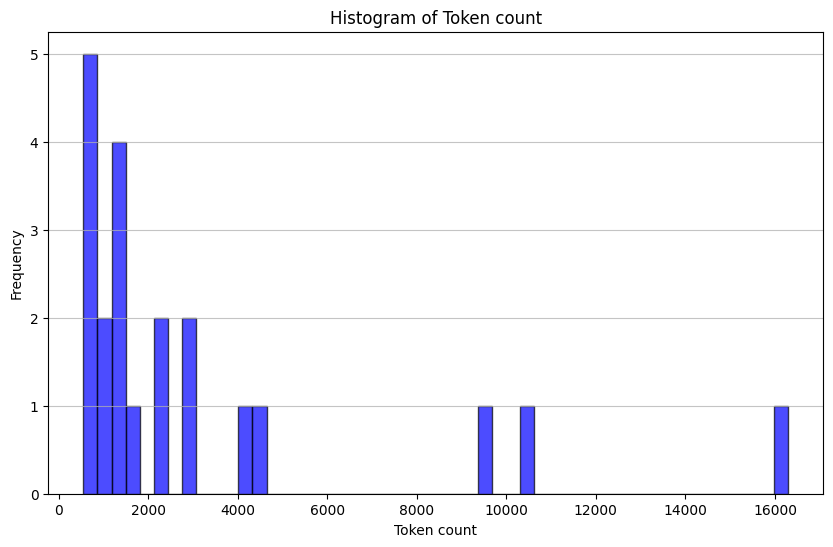

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(counts, bins= 50, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token count")
plt.xlabel("Token count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

In [25]:
sum(counts)

68229

#### COncat all the text

In [26]:
d_sorted= sorted(docs, key= lambda x: x.metadata['source'])
d_reversed= list(reversed(d_sorted))
concatenated_content= "\n\n\n ----- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
pprint("Number of tokens in all content: %s"
       % num_tokens_from_string(concatenated_content, "cl100k_base"))

'Number of tokens in all content: 68289'


#### Document splitting

In [27]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size_tok= 2000
text_splitter= RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size= chunk_size_tok,
                                                                    chunk_overlap=0)

text_splits= text_splitter.split_text(concatenated_content)

In [29]:
pprint(text_splits)

['Quickstart | 🦜️🔗 LangChain\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'Skip to main contentComponentsIntegrationsGuidesAPI '
 'ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTube🦜️🔗LangSmithLangSmith '
 'DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS '
 'Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersQuickstartOutput '
 'ParsersCustom Output ParserstypesRetrievalDocument loadersText '
 'splittersEmbedding modelsVector '
 'storesRetrieversIndexingCompositionToolsAgentsChainsMoreComponentsModel '
 'I/OOutput parsersQuickstartOn this pageQuickstartLanguage models output '
 'text. But many times you may want to get more structured information than '
 'just text back. This is where output parsers come in.Output parsers are '
 'classes that help structure language model responses. There are two main '
 'methods an output parser must implement:"Get format instructions": A method '
 'which returns a string containing instructions for h

## Setup models

In [34]:
from langchain_openai import OpenAIEmbeddings
embd= OpenAIEmbeddings()

from langchain_openai import ChatOpenAI
model= ChatOpenAI(temperature=0, model= 'gpt-3.5-turbo')

## Tree construction
The clustering approach is following few algorithms

#### GMM (Gaussian Mixture Model)
* Model the distribution of points across different clusters
* Optimal number of clusters by evaluating model's Bayesian Information Criterion (IBC)

### UMAP (Uniform Manifold Approximation and Projection)
* Reduces the dimensionality of high-dimensional data
* supports clustering
* Helps to hilight the natural group of data points based on their similarities

### Local and global clustering
* Used to analyse data and different scales
* Both fine-grained and border patterns within the data points based on siilarities

### Thresholding
* Apply in the context of GMM to determine cluster membership
* Based on the probability distribution (assingment of data points >= 1 cluster)
---
Code for GMM and thresholding is from Sarthi et al, as noted in the below two sources:
* [original repo](https://github.com/parthsarthi03/raptor/blob/master/raptor/cluster_tree_builder.py)
* [Minor Tweaks](https://github.com/run-llama/llama_index/blob/main/llama-index-packs/llama-index-packs-raptor/llama_index/packs/raptor/clustering.py)

Full credit to both the authors



In [33]:
from typing import Dict, Tuple, Optional, List

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture
RANDOM_SEED= 224

/Users/vikaslakka/opt/miniconda3/envs/data_privacy/lib/python3.10/site-packages/tqdm-4.66.2-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Clustering
* It is basically combining multiple docs of same intention and clubbing them.
* Then create a summary out of those docs
* We will get one more layer of summary
* Combine summaries with same intention
* Create summary from those summary and create one more level.
* Continue untill you get single summary or the same summary

- Use **GMM** as clustering technique
- When using GM you might face slowness due to higher dimensionality
- Hence we use UMAP to reduce dimension and considerably less loss compared to other algos such as PCA, t-SNE
- To Determine optimal number of clusters we use **BIC** as it will penalise model complexity and reward goodness of fit

In [35]:
def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim:int,
    n_neighbors: Optional[int] = None,
    metric: str="cosine",
    ) -> np.ndarray:
    """
    Function definition:
        Perform global dimensionality reduction on the embeddings using UMAP
    Parameters:
    - Embeddings: input embeddings
    - dim: The target dimensionality for reduced space
    - n_neighbors: Optional: Number of neighbors consider for each points.
                             If not specified, it defaults to square root of number of embeddings
    - metric: The distance metric to use for UMAP
    
    returns:
    - A numpy array of the embbedings reduced to the specified dimensionality.        
    """
    if n_neighbors is None:
        n_neighbors= int((len(embeddings)-1) ** 0.5)
    return umap.UMAP(
        n_neighbors= n_neighbors, n_components= dim, metric= metric
    ).fit_transform(embeddings)

In [36]:
def local_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    num_neighbors: int = 10,
    metric: str = "cosine"
    ) -> np.ndarray:
    """
    Funcion definition:
    Perform local dimensionality reduction. Basically creates local clustering inside global clustering

    Parameters:
    - embeddings: input embeddings as numpy array
    - dim: Targer dimensionality for reduced space (to how much dimension do we have to reduce)
    - num_neighbors: Number of neighbors to consider for each point
    - metric: Distance to be used for UMAP

    Returns:
    - A numpy array of embeddings reduced to specified dimensionality.
    """
    return umap.UMAP(n_neighbors=num_neighbors, n_components=dim,
                    metric= metric).fit_transform(embeddings)

In [46]:
def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int= RANDOM_SEED
) -> int:
    """Determine the optimal number of clusters using Bayesian Information Criterion (BIC) with a 
       Gaussian Mixture Model

    Args:
        embeddings (np.ndarray): input embeddings of numpy array
        max_clusters (int, optional): maximum number of clusters to consider. Defaults to 50.
        random_state (int, optional): seed for reproducibility. Defaults to RANDOM_SEED.

    Returns:
        int: result with optimal number of clusters found.
    """
    max_clusters= min(max_clusters, len(embeddings))
    n_clusters= np.arange(1, max_clusters)
    bics= []
    for n in n_clusters:
        gm= GaussianMixture(n_components=n, random_state= random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
        return n_clusters[np.argmin(bics)]

**GMM Cluster**

In [47]:
def GMM_cluster(embeddings: np.ndarray, threshold: float,
                random_state: int = RANDOM_SEED) -> Tuple:
    """Cluster embedding using GMM based on probability threshold.

    Args:
        embeddings (np.ndarray): input embeddings as numpy array
        threshold (float): the probability threshold for assigning an embedding to a cluster
        random_state (int, optional): Seed for reproducibility. Defaults to RANDOM_SEED.
    Returns:
            - A tuple containing cluster labels and number of clusters determined.
    """
    ## Get optimal number of clusters using GMM
    n_clusters= get_optimal_clusters(embeddings)
    ##Create labels and clusters using GMM again
    gm= GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs= gm.predict_proba(embeddings)
    labels= [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters
    